<a href="https://colab.research.google.com/github/koya-namba/PyTorch_practice/blob/main/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%82%92PyTorch%E3%81%A7%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形回帰をPyTorchで実装


## ライブラリのインポート
torch.nnはネットワークを構成するパッケージ，
torch.optimは最適化を行うためのパッケージである．

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

ランダムシードの固定は，以下のコードを実行する．

In [2]:
torch.manual_seed(123)

In [4]:
a = 3
b = 2
x = torch.linspace(0, 5, 100).view(100, 1)

※xについて，viewを用いてshapeを変更している理由は，バッチ数を100，入力数を1に変更するためである．

モデルにデータを与えるときは，バッチ数が最初に来ることに注意する．

In [5]:
eps = torch.randn(100, 1)
y = a*x + b + eps

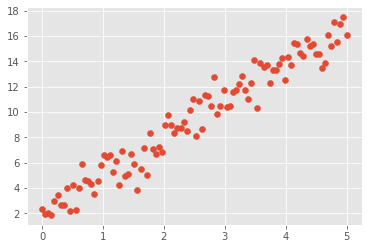

In [6]:
plt.scatter(x, y)

## モデルの構築

今回は線形回帰のため，入力の数を1，出力の数を1とする．

In [8]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    def forward(self, x):
        output = self.linear(x)
        return output

### 初期テスト
モデルの使い方を覚えるために適当なデータを与えてみる．

In [9]:
model = LR()

In [10]:
x_test = torch.tensor([[1.0], [2.0]])

In [11]:
model(x_test)

tensor([[-0.6505],
        [-1.4166]], grad_fn=<AddmmBackward>)

多くのデータを与えてみる．

In [12]:
x2 = torch.linspace(0, 3, 100).view(100, 1)

In [13]:
x2.size()

torch.Size([100, 1])

In [14]:
y_pred = model(x2)

y_predには，勾配のデータも収納されているため，detachで勾配の情報をなくす．

モデルからデータを取り出すときにはこの設定を忘れないように．

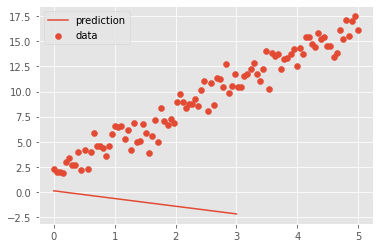

In [18]:
plt.plot(x2, y_pred.detach(), label='prediction')
plt.scatter(x, y, label='data')
plt.legend()

criterionには，損失関数の情報を入れる．今回は，平均二乗誤差である．

optimizerには，最適化を行うためのアルゴリズムを与える．引数には，モデルのパラメータと学習率を渡すようにする．

In [19]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 学習
損失を記録するリストを用意する．実際には，精度を収納するリストもある．

今回は，ミニバッチはつくらず，全部のデータを一気に渡す．
そのため，エポック数は500である．

optimizerの初期化も忘れないようにする．

loss.item()は，tensorから値を取り出すときに用いる．

In [20]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch: {}, loss: {}'.format(epoch, loss.item()))
        losses.append(loss)

epoch: 0, loss: 156.7843017578125
epoch: 10, loss: 108.7425765991211
epoch: 20, loss: 75.52831268310547
epoch: 30, loss: 52.56508255004883
epoch: 40, loss: 36.68894958496094
epoch: 50, loss: 25.712505340576172
epoch: 60, loss: 18.12348175048828
epoch: 70, loss: 12.876379013061523
epoch: 80, loss: 9.248371124267578
epoch: 90, loss: 6.7397308349609375
epoch: 100, loss: 5.004981517791748
epoch: 110, loss: 3.805262565612793
epoch: 120, loss: 2.975445508956909
epoch: 130, loss: 2.4013638496398926
epoch: 140, loss: 2.0040884017944336
epoch: 150, loss: 1.7290524244308472
epoch: 160, loss: 1.5385342836380005
epoch: 170, loss: 1.4064483642578125
epoch: 180, loss: 1.3147625923156738
epoch: 190, loss: 1.2510120868682861
epoch: 200, loss: 1.206579327583313
epoch: 210, loss: 1.1755024194717407
epoch: 220, loss: 1.1536647081375122
epoch: 230, loss: 1.1382169723510742
epoch: 240, loss: 1.127191185951233
epoch: 250, loss: 1.1192245483398438
epoch: 260, loss: 1.1133769750595093
epoch: 270, loss: 1.1089

損失の値が下がっていることがわかる．図示をしてみる．

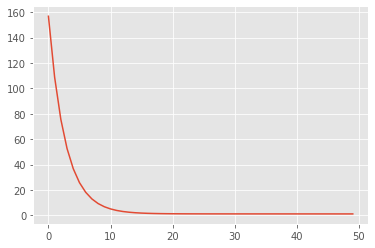

In [21]:
plt.plot(losses)

## テスト

グラフにモデルから予測した値をプロットするときは，detachを忘れずに．

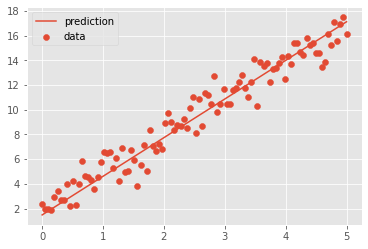

In [22]:
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label='prediction')
plt.scatter(x, y, label='data')
plt.legend()

## まとめ
今回の一連の流れを記述する．これが，PyTorchを用いて深層学習の流れである．

### ライブラリのインポート

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

### データの準備

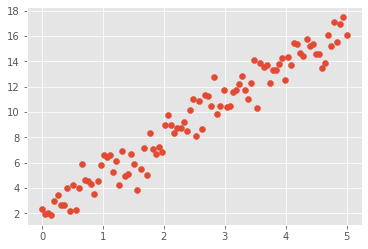

In [24]:
a = 3
b = 2
x = torch.linspace(0, 5, 100).view(100, 1)

torch.manual_seed(123)
eps = torch.randn(100, 1)
y = a*x + b + eps

plt.scatter(x, y)

### モデルの構築

In [25]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    def forward(self, x):
        output = self.linear(x)
        return output

In [26]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 学習

In [28]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch: {}, loss: {}'.format(epoch, loss.item()))
        losses.append(loss)

epoch: 0, loss: 1.0428428649902344
epoch: 10, loss: 1.042282223701477
epoch: 20, loss: 1.0417269468307495
epoch: 30, loss: 1.041176676750183
epoch: 40, loss: 1.040631651878357
epoch: 50, loss: 1.0400915145874023
epoch: 60, loss: 1.0395563840866089
epoch: 70, loss: 1.0390263795852661
epoch: 80, loss: 1.0385011434555054
epoch: 90, loss: 1.0379809141159058
epoch: 100, loss: 1.0374653339385986
epoch: 110, loss: 1.0369545221328735
epoch: 120, loss: 1.0364487171173096
epoch: 130, loss: 1.035947322845459
epoch: 140, loss: 1.0354505777359009
epoch: 150, loss: 1.0349584817886353
epoch: 160, loss: 1.034471035003662
epoch: 170, loss: 1.0339879989624023
epoch: 180, loss: 1.0335094928741455
epoch: 190, loss: 1.033035397529602
epoch: 200, loss: 1.0325655937194824
epoch: 210, loss: 1.0321003198623657
epoch: 220, loss: 1.0316390991210938
epoch: 230, loss: 1.0311822891235352
epoch: 240, loss: 1.0307296514511108
epoch: 250, loss: 1.0302813053131104
epoch: 260, loss: 1.0298371315002441
epoch: 270, loss: 

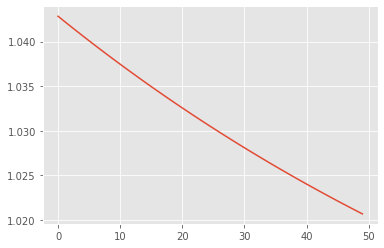

In [29]:
plt.plot(losses)

### テスト

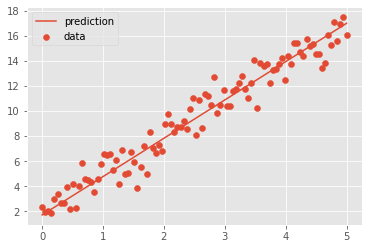

In [30]:
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label='prediction')
plt.scatter(x, y, label='data')
plt.legend()